# Machine Learning Exercises - Classification

This notebook will be used to create a classification model from a Bank dataset, to predict churn rate, using Pandas, NumPy, and Scikit-learn libraries.

In [133]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Using GitHuB API to import the data on the CSV file.

In [1]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Machine-Learning-Exercises/main/Churn_Modelling.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  668k  100  668k    0     0  1353k      0 --:--:-- --:--:-- --:--:-- 1351k


# Exploring The Dataset

Taking the data to a DataFrame.

In [51]:
df = pd.read_csv('/content/Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [53]:
df.shape

(10000, 14)

Checking overall info about the values on each numerical column.

In [54]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking the histograms of the numerical columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f300906b290>,
      dtype=object)

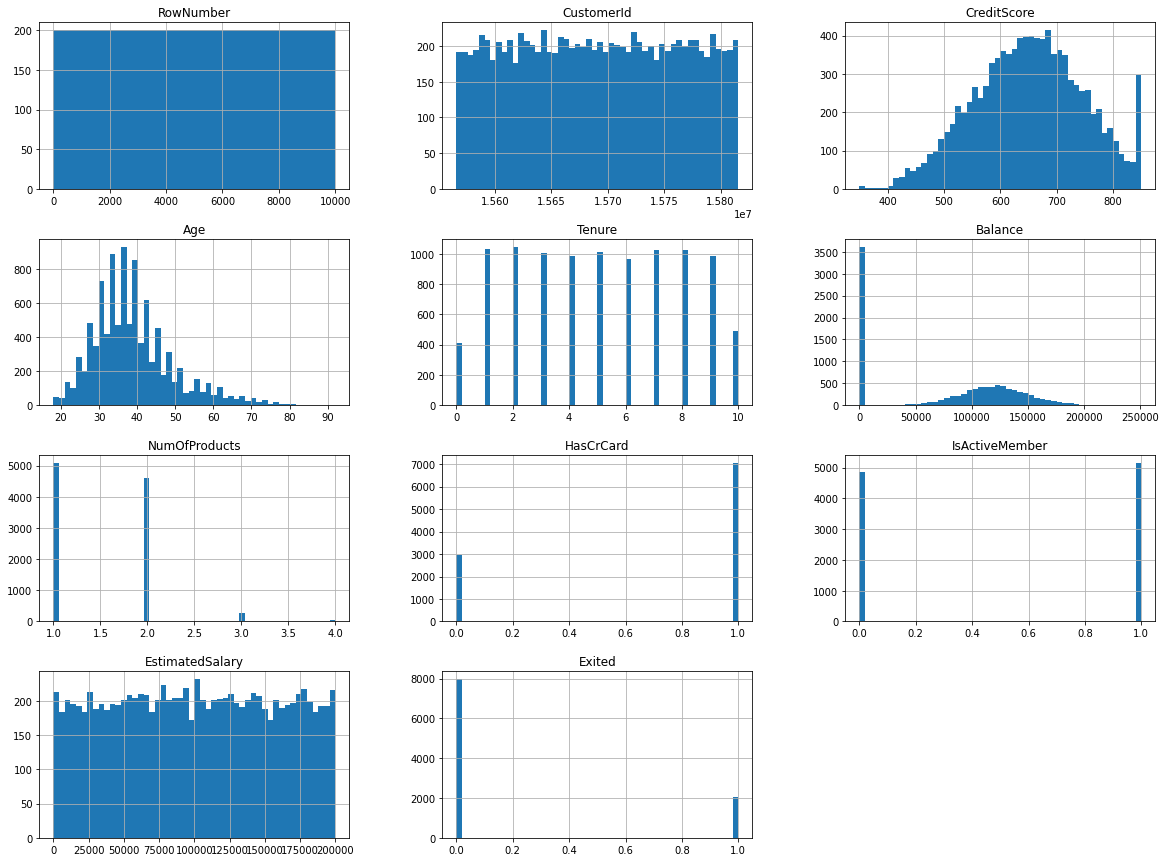

In [56]:
df.hist(bins=50,
        figsize=(20,15) )

Dropping columns that won't be used.

In [57]:
df = df.drop('RowNumber', axis=1)
df = df.drop('CustomerId', axis=1)
df = df.drop('Surname', axis=1)

Checking the non-numerical columns left.

In [58]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [82]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Creating a credit category column, to use it to stratify the train and test split, in order to guarantee a equal distribution of it in both parts of the split.

In [59]:
df['credit_cat'] = pd.cut(df['CreditScore'],
                           bins=[0, 500, 600, 700, 800, np.inf],
                           labels=[1, 2, 3, 4, 5])

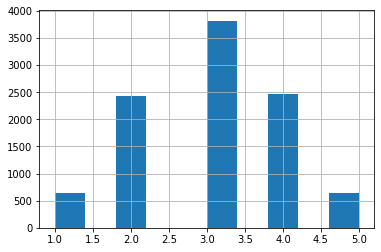

In [60]:
df['credit_cat'].hist()

In [61]:
df['credit_cat'].value_counts()

3    3818
4    2471
2    2423
5     645
1     643
Name: credit_cat, dtype: int64

In [62]:
df['credit_cat'].value_counts(normalize=True)

3    0.3818
4    0.2471
2    0.2423
5    0.0645
1    0.0643
Name: credit_cat, dtype: float64

In [63]:
df_strat_train, df_strat_test = train_test_split(df,
                                                 random_state=27,
                                                 test_size=0.2,
                                                 stratify=df['credit_cat'])

In [64]:
df_strat_train.shape

(8000, 12)

In [65]:
df_strat_test.shape

(2000, 12)

Confirmation of the distribution of the stratified split.

In [66]:
df_strat_train['credit_cat'].value_counts(normalize=True)

3    0.381750
4    0.247125
2    0.242250
5    0.064500
1    0.064375
Name: credit_cat, dtype: float64

Dropping the income category column, as it was used only to split the data.

In [67]:
df_strat_train = df_strat_train.drop('credit_cat',
                                     axis=1)
df_strat_test = df_strat_test.drop('credit_cat',
                                   axis=1)

In [69]:
df_strat_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

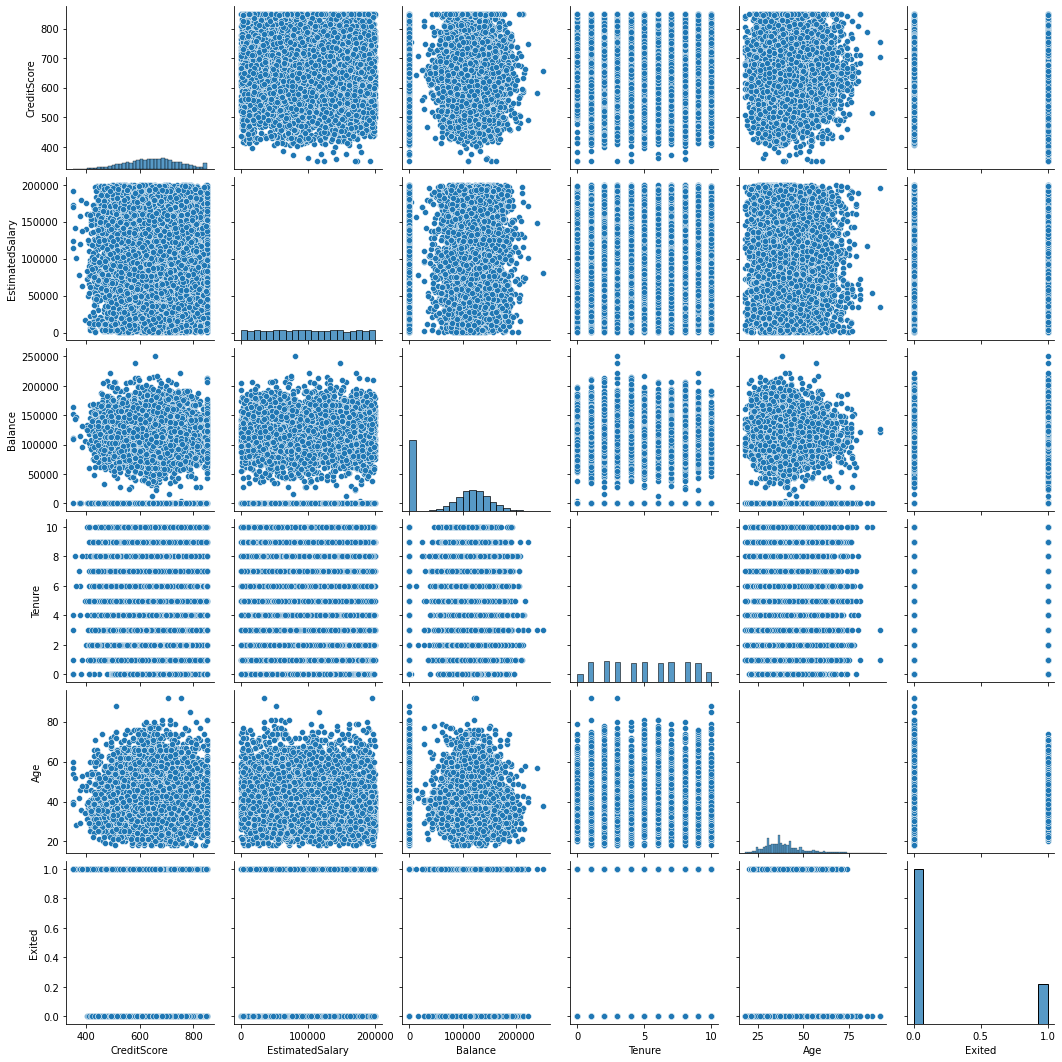

In [70]:
sns.pairplot(df_strat_train[['CreditScore',
                             'EstimatedSalary',
                             'Balance',
                             'Tenure',
                             'Age',
                             'Exited']])

# Preparing The Data

Correlation heatmap.

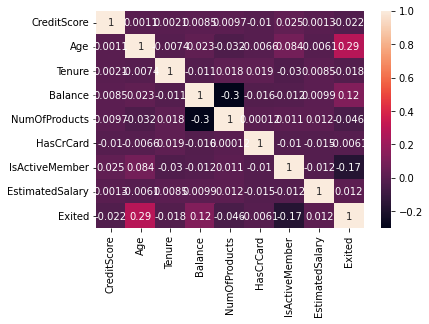

In [71]:
sns.heatmap(df_strat_train.corr(), annot=True)

In [72]:
df_strat_train.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285328
Balance            0.122271
EstimatedSalary    0.012282
HasCrCard         -0.006052
Tenure            -0.018141
CreditScore       -0.021917
NumOfProducts     -0.046266
IsActiveMember    -0.170234
Name: Exited, dtype: float64

Spliting the train and test sets into a X and Y sets. Y refers to the value we are going to predict, churn, and X refers to the others columns besides it.

In [85]:
x_train = df_strat_train.drop('Exited', axis=1)
y_train = df_strat_train['Exited']

x_test = df_strat_test.drop('Exited', axis=1)
y_test = df_strat_test['Exited']

In [86]:
x_train.shape

(8000, 10)

In [87]:
x_test.shape

(2000, 10)

Confirming we don't have null values.

In [88]:
x_train.isnull().sum(axis=0)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [89]:
x_test.isnull().sum(axis=0)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Transforming categorical columns. In this case, Geography and Gender columns.

In [90]:
x_train.Geography.value_counts()

France     4007
Germany    1999
Spain      1994
Name: Geography, dtype: int64

In [91]:
x_train.Gender.value_counts()

Male      4366
Female    3634
Name: Gender, dtype: int64

In [92]:
x_train = pd.get_dummies(x_train)

x_test = pd.get_dummies(x_test)

In [93]:
x_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6841,714,26,3,119545.48,2,1,0,65482.94,0,1,0,0,1
3724,772,51,9,143930.92,1,0,1,46675.51,0,1,0,1,0
3899,752,36,2,119912.46,1,1,0,124354.92,1,0,0,1,0
4923,651,34,2,90355.12,2,0,0,193597.94,0,1,0,0,1
4873,581,37,7,0.00,2,1,1,74320.75,1,0,0,0,1


Scalling the data. Robust scaler will be used here, as we have outliers. Standard scaler would not deal well with these outliers.

In [95]:
x_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.556500,38.943875,5.003375,76103.428275,1.534625,0.704875,0.515000,99764.669042,0.500875,0.249875,0.249250,0.454250,0.545750
std,96.664885,10.492437,2.889664,62469.850475,0.584888,0.456127,0.499806,57648.603248,0.500030,0.432968,0.432606,0.497934,0.497934
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50385.392500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,96889.925000,1.000000,1.000000,1.000000,99796.845000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127514.180000,2.000000,1.000000,1.000000,148990.230000,1.000000,0.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [102]:
attributes = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [103]:
x_train[attributes].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
6841,714,26,3,119545.48,2,65482.94
3724,772,51,9,143930.92,1,46675.51
3899,752,36,2,119912.46,1,124354.92
4923,651,34,2,90355.12,2,193597.94
4873,581,37,7,0.00,2,74320.75


Transformer fitting, using the training data.

In [104]:
transformer = RobustScaler().fit(x_train[attributes])

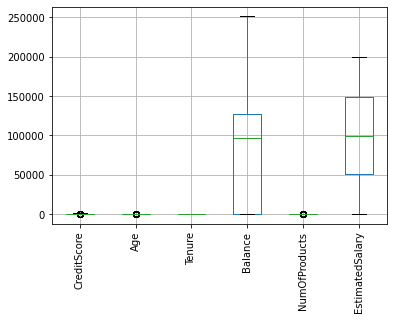

In [105]:
x_train[attributes].boxplot(rot=90)

In [106]:
x_train[attributes] = transformer.transform(x_train[attributes])

x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6841,0.466165,-0.916667,-0.50,0.177671,1.0,1,0,-0.347994,0,1,0,0,1
3724,0.902256,1.166667,1.00,0.368908,0.0,0,1,-0.538730,0,1,0,1,0
3899,0.751880,-0.083333,-0.75,0.180549,0.0,1,0,0.249055,1,0,0,1,0
4923,-0.007519,-0.250000,-0.75,-0.051248,1.0,0,0,0.951283,0,1,0,0,1
4873,-0.533835,0.000000,0.50,-0.759836,1.0,1,1,-0.258366,1,0,0,0,1


In [110]:
x_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.010853,0.161990,0.000844,-0.163013,0.534625,0.704875,0.515000,-0.000326,0.500875,0.249875,0.249250,0.454250,0.545750
std,0.726804,0.874370,0.722416,0.489905,0.584888,0.456127,0.499806,0.584643,0.500030,0.432968,0.432606,0.497934,0.497934
min,-2.270677,-1.583333,-1.250000,-0.759836,0.000000,0.000000,0.000000,-1.011158,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.511278,-0.416667,-0.500000,-0.759836,0.000000,0.000000,0.000000,-0.501106,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.488722,0.583333,0.500000,0.240164,1.000000,1.000000,1.000000,0.498894,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.488722,4.583333,1.250000,1.207773,3.000000,1.000000,1.000000,1.015913,1.000000,1.000000,1.000000,1.000000,1.000000


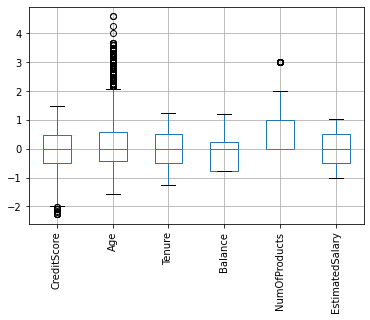

In [107]:
x_train[attributes].boxplot(rot=90)

Scalling the test data, also with the transformer fitted using the training data.

In [108]:
x_test[attributes] = transformer.transform(x_test[attributes])

x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2979,-0.075188,0.250000,-1.0,0.454641,0.0,1,1,0.387969,1,0,0,0,1
9936,-0.323308,3.333333,-1.0,-0.759836,0.0,0,1,-0.822354,1,0,0,0,1
1335,-0.631579,0.500000,1.0,-0.759836,0.0,1,0,0.264429,0,0,1,1,0
7364,0.142857,-0.250000,0.0,0.532236,0.0,1,0,0.111070,1,0,0,1,0
1277,0.684211,0.416667,0.5,-0.155965,1.0,1,1,-0.196425,1,0,0,0,1


In [109]:
x_test[attributes].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.011895,0.152792,0.012625,-0.148016,0.512500,0.016183
std,0.726549,0.872618,0.725653,0.486995,0.568336,0.577562
min,-2.270677,-1.583333,-1.250000,-0.759836,0.000000,-1.011971
25%,-0.518797,-0.416667,-0.500000,-0.759836,0.000000,-0.461014
50%,-0.015038,0.000000,0.000000,0.012843,0.000000,0.024910
75%,0.498120,0.500000,0.750000,0.246921,1.000000,0.517394
max,1.488722,3.916667,1.250000,0.905186,3.000000,1.016133


# Selecting And Training Models

Testing some model types and base AUC.

In [114]:
for model_name in [DummyClassifier,
                   LogisticRegression,
                   DecisionTreeClassifier,
                   KNeighborsClassifier, 
                   GaussianNB,
                   SVC,
                   RandomForestClassifier]:
    model = model_name()
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring='roc_auc',
                             cv=10)
    model_mean = scores.mean()
    model_std = scores.std()
    print("{:22} AUC:{: .3f} STD:{: .3f}".format(model_name.__name__, 
                                                 model_mean, 
                                                 model_std))

DummyClassifier        AUC: 0.500 STD: 0.000
LogisticRegression     AUC: 0.771 STD: 0.021
DecisionTreeClassifier AUC: 0.685 STD: 0.031
KNeighborsClassifier   AUC: 0.778 STD: 0.028
GaussianNB             AUC: 0.788 STD: 0.022
SVC                    AUC: 0.834 STD: 0.024
RandomForestClassifier AUC: 0.853 STD: 0.017


Using the Random Forest model.

In [154]:
rf = RandomForestClassifier()

In [155]:
rf.fit(x_train, y_train)

RandomForestClassifier()

Random forest evaluation. The error being equal to zero on the train data indicates that we have a overfitted model.

In [156]:
accuracy_score(y_train.values,
               rf.predict(x_train))

1.0

In [157]:
accuracy_score(y_test.values,
               rf.predict(x_test))

0.8665

Using cross validation to check the overfitting without needing to use the test data.

In [138]:
scores = cross_val_score(rf,
                         x_train,
                         y_train,
                         scoring='accuracy',
                         cv=10)

In [141]:
scores

array([0.8825 , 0.87375, 0.84625, 0.85125, 0.8525 , 0.84125, 0.83625,
       0.8725 , 0.8675 , 0.855  ])

# Fine Tuning The Model

Selecting parameters lists to test each combination of them, in order to get the best model parameter calibration.

In [142]:
parameters = {'n_estimators':[40, 60, 80, 100], 'max_features':[4, 6, 8], 'max_depth':[10, 12, None]}
#{'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}

In [143]:
rf = RandomForestClassifier()

In [144]:
grid_search = GridSearchCV(rf,
                           parameters,
                           cv=5,
                           scoring='accuracy',
                           return_train_score=True)

In [145]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 12, None], 'max_features': [4, 6, 8],
                         'n_estimators': [40, 60, 80, 100]},
             return_train_score=True, scoring='accuracy')

Checking the best found parameters.

In [146]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 8, 'n_estimators': 100}

In [147]:
grid_search.best_score_

0.8634999999999999

Checking the performance of each parameter combination.

In [151]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'],cv_res['params']):
  print(mean_score, params)

0.85975 {'max_depth': 10, 'max_features': 4, 'n_estimators': 40}
0.8585 {'max_depth': 10, 'max_features': 4, 'n_estimators': 60}
0.859 {'max_depth': 10, 'max_features': 4, 'n_estimators': 80}
0.85925 {'max_depth': 10, 'max_features': 4, 'n_estimators': 100}
0.8619999999999999 {'max_depth': 10, 'max_features': 6, 'n_estimators': 40}
0.861125 {'max_depth': 10, 'max_features': 6, 'n_estimators': 60}
0.8612500000000001 {'max_depth': 10, 'max_features': 6, 'n_estimators': 80}
0.860375 {'max_depth': 10, 'max_features': 6, 'n_estimators': 100}
0.8608750000000001 {'max_depth': 10, 'max_features': 8, 'n_estimators': 40}
0.8618750000000001 {'max_depth': 10, 'max_features': 8, 'n_estimators': 60}
0.8632500000000001 {'max_depth': 10, 'max_features': 8, 'n_estimators': 80}
0.8634999999999999 {'max_depth': 10, 'max_features': 8, 'n_estimators': 100}
0.8600000000000001 {'max_depth': 12, 'max_features': 4, 'n_estimators': 40}
0.8598750000000001 {'max_depth': 12, 'max_features': 4, 'n_estimators': 60}


Extracting the best estimator found.

In [152]:
rf_v2 = grid_search.best_estimator_

In [158]:
accuracy_score(y_test.values,
               rf_v2.predict(x_test))

0.868